# Set up the environment

In [1]:
!/opt/conda/bin/pip install -e . develop --user 
!pip uninstall deap -y
!pip install deap
!git config --global user.email "rjjarvis@asu.edu"
!git config --global user.name "Russell Jarvis"


#!pip install --user git+https://github.com/fun-zoological-computing/deap

#!git clone https://github.com/fun-zoological-computing/deap.git
#!cp deap/deap/tools/emo.py /home/russelljjarvis/.local/lib/python3.7/site-packages/deap/tools/emo.py
    
#!pip install --user git+https://github.com/scidash/sciunit@dev
#!pip install --user git+https://github.com/scidash/python-quantities@master#egg=quantitities-9999
!pip install rickpy

Obtaining file:///home/russelljjarvis/NeuronunitOpt
  Found existing installation: neuronunit-opt 0.1
    Uninstalling neuronunit-opt-0.1:
      Successfully uninstalled neuronunit-opt-0.1
  Running setup.py develop for neuronunit-opt
Uninstalling deap-1.3.0:
ERROR: Exception:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/shutil.py", line 566, in move
    os.rename(src, real_dst)
PermissionError: [Errno 13] Permission denied: '/opt/conda/lib/python3.7/site-packages/deap-1.3.0.dist-info/' -> '/tmp/pip-uninstall-6mc4w46n'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/base_command.py", line 188, in main
    status = self.run(options, args)
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/commands/uninstall.py", line 75, in run
    auto_confirm=options.yes, verbose=self.verbosity > 0,
  File "/opt/conda/lib/python3.7/site-packages/pip

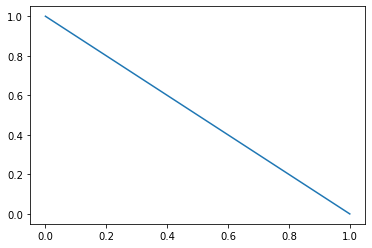

INFO:root:test


(-75, -56)
Import of badexp.ADEXPBackend failed due to:
No module named 'neuronunit.models.backends.badexp'
Import of bhh.BHHBackend failed due to:
No module named 'neuronunit.models.backends.bhh'
Import of general_pyNN.PYNNBackend failed due to:
NEURON mechanisms not found in /home/russelljjarvis/.local/lib/python3.7/site-packages/pyNN/neuron/nmodl. You may need to run 'nrnivmodl' in this directory.
agg


In [2]:
import warnings
warnings.filterwarnings("ignore")
#warnings.filter()
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()
from neuronunit.unit_test.working import hide_imports
from neuronunit.optimisation.optimization_management import inject_and_plot_model
plot_backend = mpl.get_backend()
print(plot_backend)


# Design simulated data tests

In [3]:
def jrt(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = hide_imports.model_parameters.MODEL_PARAMS[backend]

    OM = hide_imports.OptMan(use_test,\
                backend=backend,\
                boundary_dict=edges,\
                protocol={'allen': False, 'elephant': True})

    return OM



In [4]:
test_frame = hide_imports.get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
stds = {}
for k,v in hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6']).items():
    temp = hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6'])[k]
    stds[k] = temp.observation['std']
    print((temp.name,temp.observation))
OMObjects = []
backends = ["RAW"]
import copy
cloned_tests = copy.copy(test_frame['Neocortex pyramidal cell layer 5-6'])
import copy
for b in backends:        
    OM = jrt(cloned_tests,b)
    OMObjects.append(OM)
rt_outs = []

('RheobaseTest', {'mean': array(213.84958333) * pA, 'std': array(170.45245472) * pA, 'n': 32})
('InjectedCurrentAPAmplitudeTest', {'mean': array(80.43510204) * mV, 'std': array(12.74880304) * mV, 'n': 49})
('InjectedCurrentAPThresholdTest', {'mean': array(-42.73572327) * mV, 'std': array(8.04073233) * mV, 'n': 53})


In [5]:
print(test_frame['Hippocampus CA1 pyramidal cell'])
print(test_frame['Neocortex pyramidal cell layer 5-6'])

Suite_326017899783
Suite_133294468230


In [6]:
for OM in OMObjects:
   print(OM.backend)
   x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
   cloned_tests = copy.copy(OM.tests)
   OM.tests = hide_imports.TSD(cloned_tests)
   rt_out = OM.simulate_data(OM.tests,OM.backend,OM.boundary_dict)
   #print(rt_out)


RAW
RheobaseTest
{'value': array(44.03017759) * pA} is this called?
InjectedCurrentAPAmplitudeTest
{'value': array(68.08515007) * mV, 'mean': array(68.08515007) * mV, 'std': array(0.) * mV, 'n': 1} is this called?
InjectedCurrentAPThresholdTest
{'mean': array(-9.46067635) * mV, 'std': array(0.) * mV, 'n': 1} is this called?
Random simulated data tests made


In [7]:
penultimate_tests = hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6'])
for k,v in penultimate_tests.items():
    temp = penultimate_tests[k]

    v = rt_out[1][k].observation
    v['std'] = stds[k]
simulated_data_tests = hide_imports.TSD(penultimate_tests)

# Show what the randomly generated target waveform the optimizer needs to find actually looks like

(AnalogSignal with 1 channels of length 130000; units mV; datatype float64 
 sampling rate: 100.0
 time: 0.0 to 1.3,
 <module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

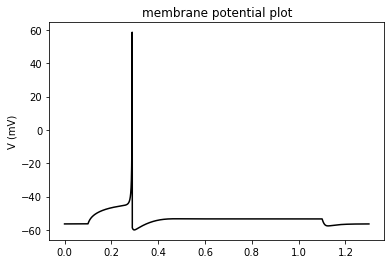

In [8]:
target = rt_out[0]
target.rheobase
inject_and_plot_model(target)

(20, 1)


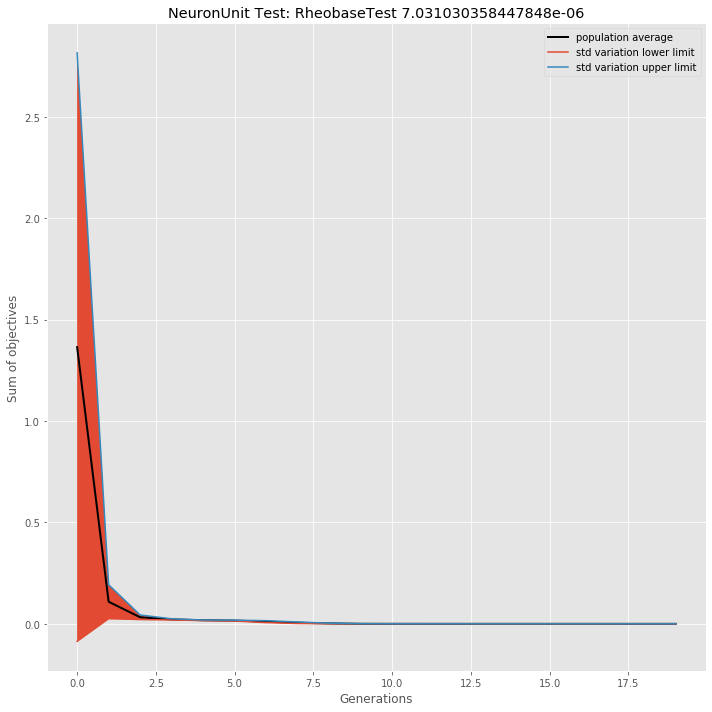

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

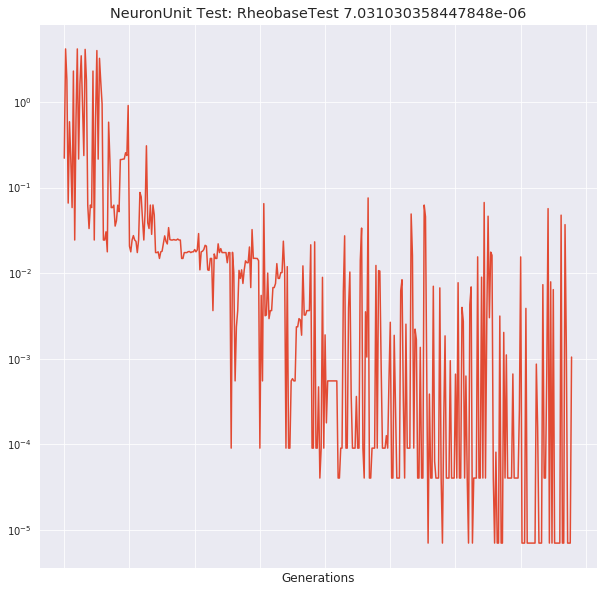

,RheobaseTest,total
observations,44.0301775932312 pA,NaN
predictions,44.03167963027954 pA,NaN
scores,7.03103e-06,0.000007


(20, 1)


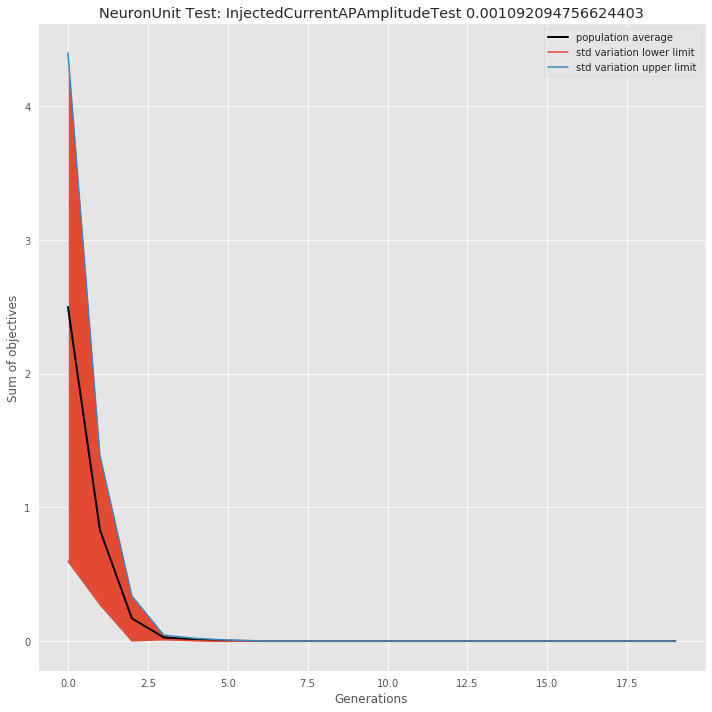

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

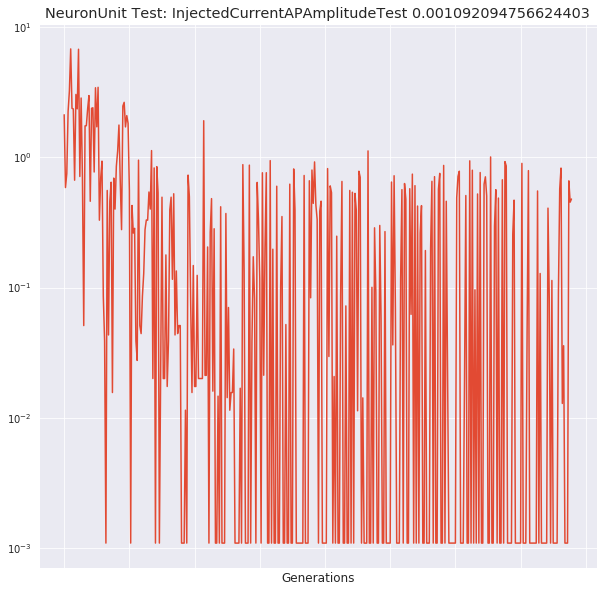

,InjectedCurrentAPAmplitudeTest,total
observations,68.08515007468743 mV,NaN
predictions,68.10259032378565 mV,NaN
scores,0.00109209,0.001092


(20, 1)


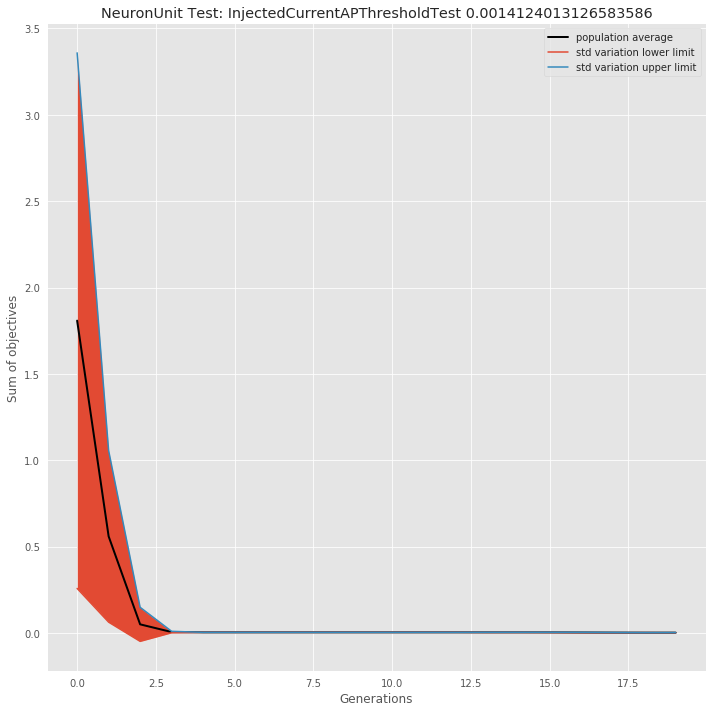

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

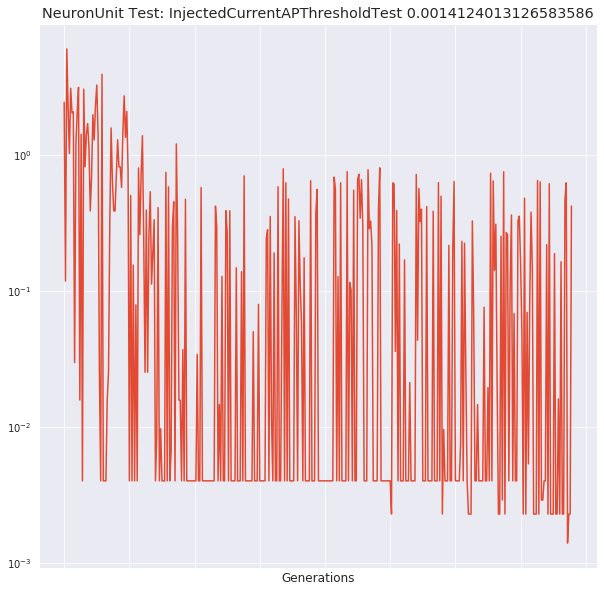

,InjectedCurrentAPThresholdTest,total
observations,-9.460676350443128 mV,NaN
predictions,-9.474899874767571 mV,NaN
scores,0.0014124,0.001412


In [9]:
results = {}
tests = {}
for  k in simulated_data_tests.keys():
    tests[k] = hide_imports.TSD([simulated_data_tests[k]])
    results[k] = tests[k].optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
            protocol={'allen': False, 'elephant': True},\
                MU=20,NGEN=20,plot=True)
    dtc = results[k]['pf'][0].dtc
    display(dtc.obs_preds)
    

(20, 1)


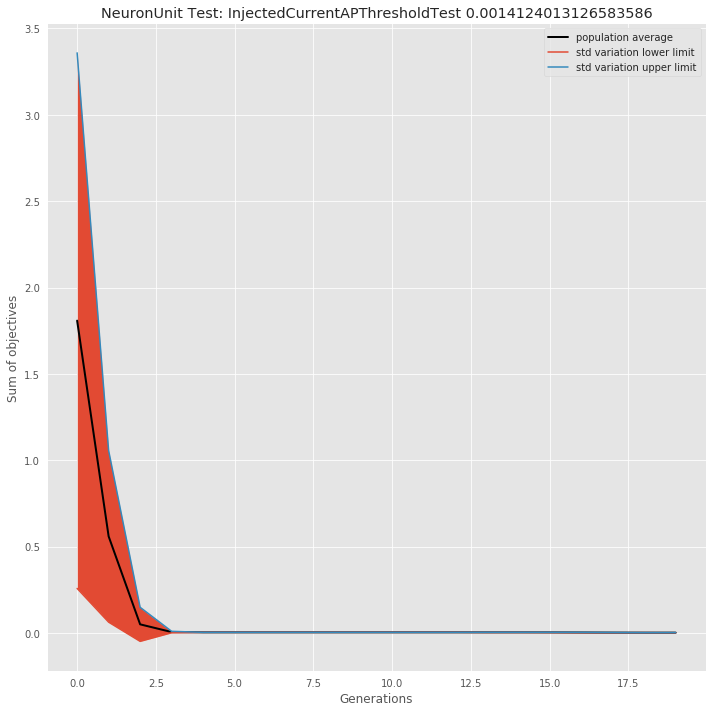

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

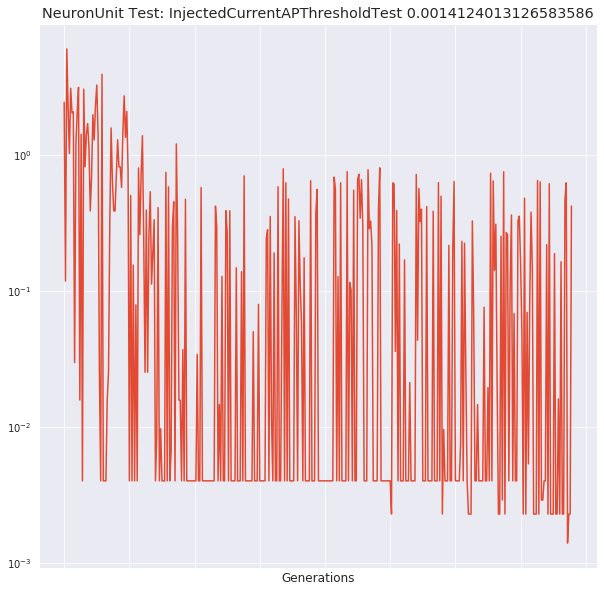

,InjectedCurrentAPThresholdTest,total
observations,-9.460676350443128 mV,NaN
predictions,-9.474899874767571 mV,NaN
scores,0.0014124,0.001412


In [10]:
results[k].keys()
plots = tests[k].elaborate_plots(tests[k],results[k])
dtc.obs_preds
#ga_out_rh.keys()


In [11]:

#plots.keys()

# Comence optimization of models on simulated data sets

# first lets just optimize over single objective functions at a time.

,RheobaseTest,total
observations,44.0301775932312 pA,NaN
predictions,43.65493655204773 pA,NaN
scores,0.00175804,0.001758


In [14]:
"""
both = hide_imports.TSD([simulated_data_tests["TimeConstantTest"],simulated_data_tests["RheobaseTest"]]).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=30,NGEN=30,plot=True)
both = both['pf'][0].dtc
both.obs_preds
"""

'\nboth = hide_imports.TSD([simulated_data_tests["TimeConstantTest"],simulated_data_tests["RheobaseTest"]]).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,        protocol={\'allen\': False, \'elephant\': True},            MU=30,NGEN=30,plot=True)\nboth = both[\'pf\'][0].dtc\nboth.obs_preds\n'

In [15]:
"""
three = hide_imports.TSD([simulated_data_tests["InjectedCurrentAPAmplitudeTest"],simulated_data_tests["TimeConstantTest"],simulated_data_tests["RheobaseTest"]]).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=25,NGEN=6,plot=True)
"""

'\nthree = hide_imports.TSD([simulated_data_tests["InjectedCurrentAPAmplitudeTest"],simulated_data_tests["TimeConstantTest"],simulated_data_tests["RheobaseTest"]]).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,        protocol={\'allen\': False, \'elephant\': True},            MU=25,NGEN=6,plot=True)\n'

In [16]:
#three = three['pf'][0].dtc
#three.obs_preds

# How about using all the objectives together?


In [ ]:
ga_out = simulated_data_tests.optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=40,NGEN=40,plot=True)
opt = ga_out['pf'][0].dtc
front = [ind.dtc for ind in ga_out['pf']]

In [ ]:
opt.rheobase


In [ ]:
inject_and_plot_model(opt)

In [ ]:
opt.obs_preds

In [ ]:
model = opt.dtc_to_model()
score = simulated_data_tests['TimeConstantTest'].judge(model)
pred = simulated_data_tests['TimeConstantTest'].prediction
print(pred)

In [ ]:
from neuronunit.optimisation.optimization_management import check_match_front
check_match_front(target,front[0:10])



In [ ]:
from neuronunit.optimisation.algorithms import cleanse
seed_pop = cleanse(copy.copy(ga_out['pf'))
OMObjects.MU =6
ga_out = simulated_data_tests.optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=6,NGEN=6,seed_pop=seed_pop)

##### 